In [1]:
from src.binance.binance_trader import BinanceTrader
import pandas as pd
import pandas_ta as ta
import hvplot.pandas
import holoviews as hv
trader = BinanceTrader(testnet=False)
idx = pd.IndexSlice

hv.extension("bokeh")

params = {
    "symbol": "BTCUSDT",
    "interval": "1m",
    "start_dt": "2024-01-01",
    "end_dt": "2024-12-31",
}

[2025-01-05 13:21:26,016] INFO - {'data': 'Normal'}


df = trader.get_candlestick_data_range(**params)

df.to_pickle("./src/data/"+"_".join(params.values()) + ".pkl")

In [2]:
df = pd.read_pickle("./src/data/"+"_".join(params.values()) + ".pkl")

In [3]:
for lag in [1, 2, 3, 10, 15, 60]:
    df.loc[:, f"Return_{lag}"] = df.loc[:, "close"].pct_change(lag)
    df.loc[:, f"Target_{lag}"] = df.loc[:, f"Return_{lag}"].shift(-lag)


df.drop(columns=["Quote Asset Volume", "Taker Buy Base Asset Volume","Taker Buy Quote Asset Volume"], inplace=True)
df.head(10)
inital_df = df.copy()
df

,open,high,low,close,volume,Number of Trades,Return_1,Target_1,Return_2,Target_2,Return_3,Target_3,Return_10,Target_10,Return_15,Target_15,Return_60,Target_60
Open Time,,,,,,,,,,,,,,,,,,
2023-12-31 23:00:00,42257.89,42291.10,42196.61,42277.25,114.76075,2898.0,NaN,-0.000594,NaN,0.000397,NaN,0.001617,NaN,-0.000613,NaN,-0.001827,NaN,0.000505
2023-12-31 23:01:00,42277.25,42296.60,42241.10,42252.14,45.96533,1919.0,-0.000594,0.000992,NaN,0.002212,NaN,0.000707,NaN,-0.000064,NaN,-0.001636,NaN,0.001606
2023-12-31 23:02:00,42252.15,42297.18,42252.14,42294.04,44.10371,1789.0,0.000992,0.001220,0.000397,-0.000284,NaN,0.000786,NaN,-0.001015,NaN,-0.003040,NaN,0.000744
2023-12-31 23:03:00,42294.04,42345.64,42294.03,42345.62,45.99365,1408.0,0.001220,-0.001502,0.002212,-0.000433,0.001617,-0.000509,NaN,-0.002116,NaN,-0.004866,NaN,0.000528
2023-12-31 23:04:00,42345.63,42345.65,42282.00,42282.01,47.50271,1296.0,-0.001502,0.001070,-0.000284,0.000995,0.000707,0.000604,NaN,-0.001227,NaN,-0.003122,NaN,0.002725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 22:56:00,92948.00,92954.56,92920.10,92945.26,7.34735,1163.0,-0.000029,-0.000375,0.001607,-0.001385,0.001303,-0.001727,0.001862,NaN,0.000251,NaN,0.008151,NaN
2024-12-30 22:57:00,92945.25,92945.26,92883.24,92910.44,5.55625,1593.0,-0.000375,-0.001011,-0.000404,-0.001353,0.001232,-0.002128,0.001152,NaN,-0.000714,NaN,0.007412,NaN
2024-12-30 22:58:00,92910.44,92910.44,92795.33,92816.52,7.21662,1978.0,-0.001011,-0.000342,-0.001385,-0.001118,-0.001415,NaN,0.000088,NaN,-0.001724,NaN,0.005988,NaN


In [4]:
MyStrategy = ta.Strategy(name="ATR_EBSW",
                         ta = [
                             {"kind" : "atr"},
                             {"kind" : "ebsw"},
                         ])

df.ta.strategy(MyStrategy)

df.dropna(inplace=True)

In [5]:
df.drop(columns=["open","high","low","close"], inplace=True)

Cross-validation: 100%|██████████| 52/52 [3:16:35<00:00, 226.83s/it]  


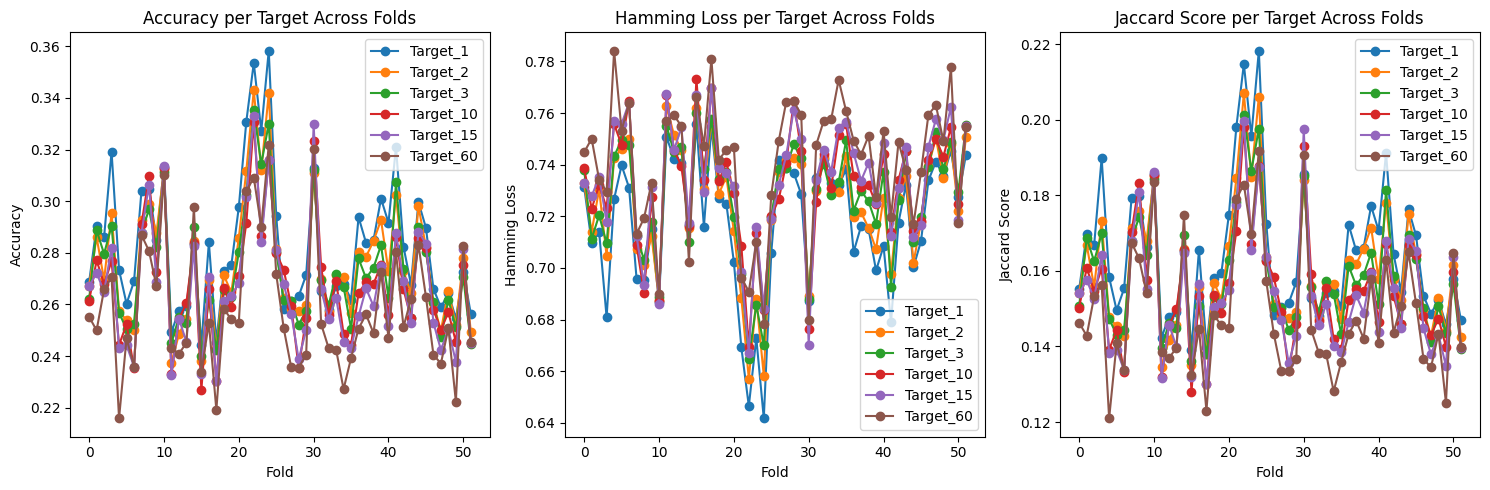

In [6]:
import re
import pandas as pd
import pandas_ta as ta
from sklearn.model_selection import TimeSeriesSplit
from tqdm import tqdm
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import RandomForestClassifier

from src.processes.Processes_101 import getXy
from src.visualization.multioutput_multiclass import plot_cross_validation_metrics

# Initialize TimeSeriesSplit
nums_split = 52
tscv = TimeSeriesSplit(n_splits=nums_split)

# Lists to store metrics for each fold
accuracies = []
hamming_losses = []
jaccard_scores = []

# Initialize KBinsDiscretizer for y
y_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')


pipeline = Pipeline([
    ("preprocessor", ColumnTransformer(transformers=[
        ("scaler", StandardScaler(), ["ATRr_14", "Number of Trades", "volume"]),
        ("discretizer", KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile'), [col for col in df if re.search(r"Return", col)])
        ],
    remainder="passthrough"
    )),
    ("model", ClassifierChain(RandomForestClassifier(n_estimators= 100, n_jobs= 4, criterion ="log_loss")))
])

cv_result = []
# Perform cross-validation with progress bar
for train_idx, test_idx in tqdm(tscv.split(df), desc="Cross-validation", total=nums_split):
    # Split data
    Dtrain = df.iloc[train_idx]
    Dtest = df.iloc[test_idx]
    
    X_train, y_train = getXy(Dtrain)
    X_test, y_test = getXy(Dtest)
    
    # Transform and fit
    y_train_tf = y_discretizer.fit_transform(y_train)
    pipeline.fit(X_train, y_train_tf)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    y_test_tf = y_discretizer.transform(y_test)
    # Convert y_pred to DataFrame with same structure as y_test_tf
    y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)
    y_test_df = pd.DataFrame(y_test_tf, index=y_test.index, columns=y_test.columns)
    cv_result.append((y_test_df, y_pred_df))
    

plot_cross_validation_metrics(cv_result)